In [90]:
%pip install numpy pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import numpy as np
import pandas as pd


In [92]:
df = pd.read_csv('dataset/spam.csv',encoding='ISO-8859-1')

In [93]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [94]:
df.shape

(5572, 5)

### 1 Data cleaning

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [96]:
#drop last 3 columns
df.drop(columns=df.columns[2:], inplace=True)

In [97]:
df.sample(5)

,v1,v2
4687,ham,Hmmm.but you should give it on one day..
349,ham,Just checking in on you. Really do miss seeing...
1638,ham,Great comedy..cant stop laughing da:)
846,ham,My stomach has been thru so much trauma I swea...
4353,spam,important information 4 orange user 0789xxxxxx...


In [98]:
##renaming the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [99]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])


In [101]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [103]:
df.duplicated().sum()

np.int64(403)

In [104]:
df.drop_duplicates(inplace=True)

### 2. EDA

In [105]:
%pip install matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import matplotlib.pyplot as plt
%matplotlib inline



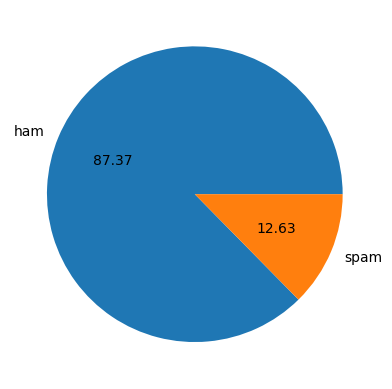

In [107]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()


In [108]:
#data is imbalanced

In [109]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [111]:
df['num_characters'] = df['text'].apply(len)

In [112]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [114]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [116]:
num_col = ['num_characters', 'num_words', 'num_sentences']
df[num_col].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [118]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [119]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

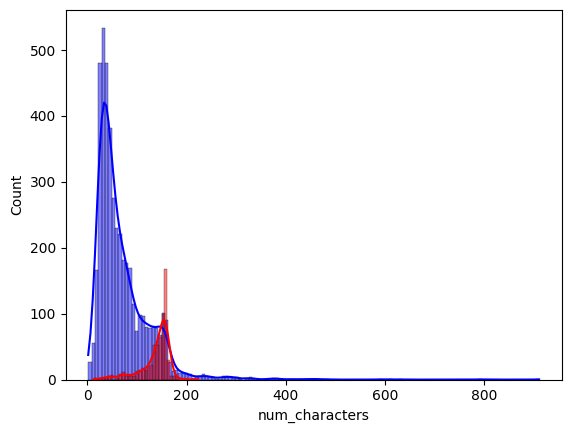

In [120]:
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

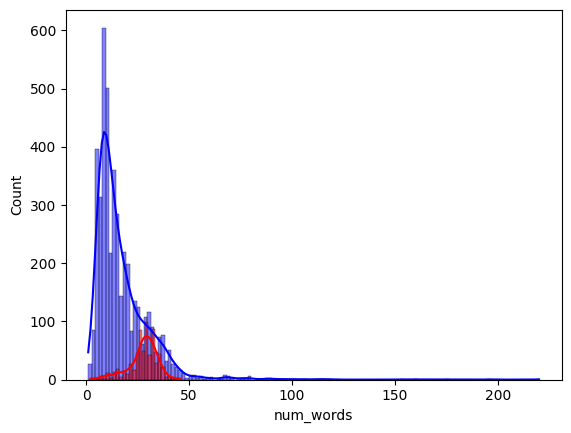

In [121]:
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', kde=True)

<Axes: xlabel='num_sentences', ylabel='Count'>

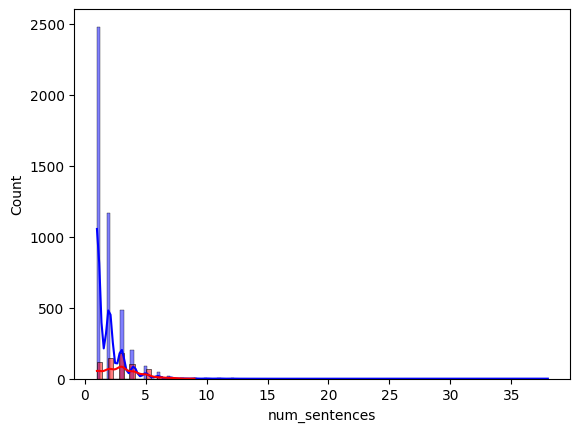

In [122]:
sns.histplot(df[df['target'] == 0]['num_sentences'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red', kde=True)

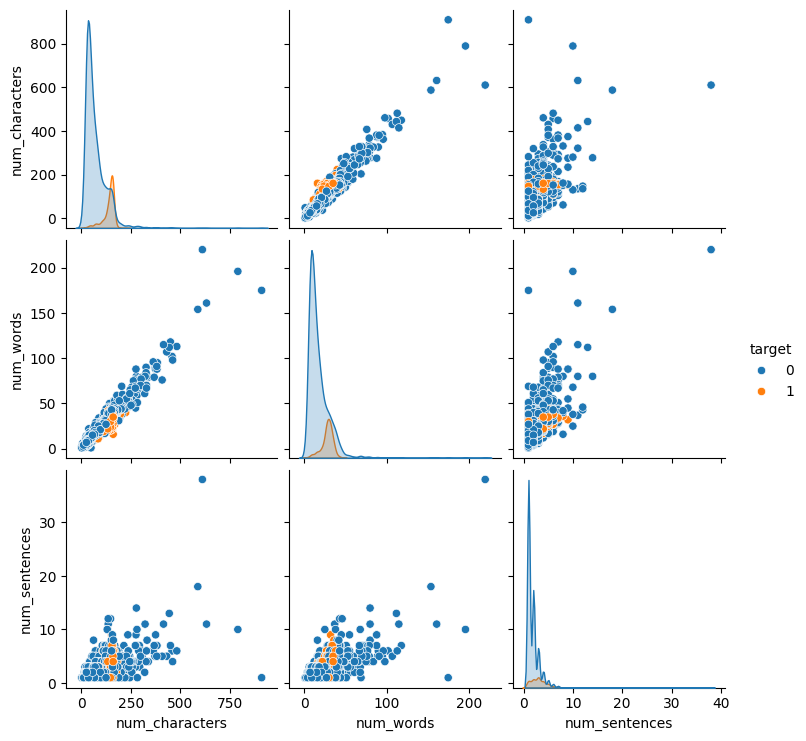

In [123]:
sns.pairplot(df,hue='target')

<Axes: >

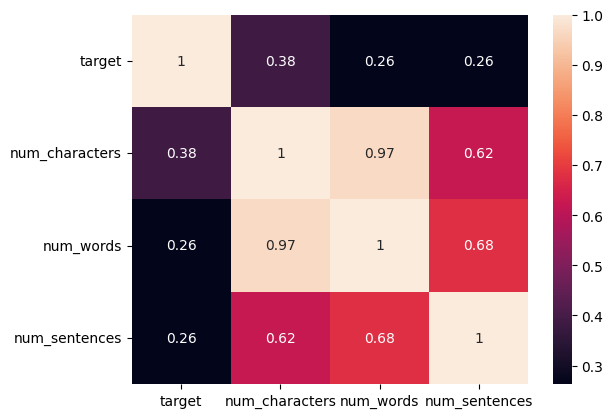

In [124]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


### 3. Data preprocessing
- lower case
- tokenization
- remove special characters
- remove stop words and punctuations
- stemming 

In [125]:
# Download stopwords
nltk.download('stopwords')

# Import libraries
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Create preprocessing function
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # 1. Lowercase
    text = nltk.word_tokenize(text)  # 2. Tokenization
    
    # 3. Remove special characters
    y = [i for i in text if i.isalnum()]
    
    # 4. Remove stopwords & punctuation
    text = [i for i in y if i not in stopwords.words('english')]
    
    # 5. Stemming
    return " ".join([ps.stem(i) for i in text])

# Apply to dataset
df['transformed_text'] = df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
df['transformed_text'] = df['text'].apply(transform_text)   

In [127]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [128]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
from wordcloud import WordCloud
wc =WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [130]:
spam_wc =  wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))  

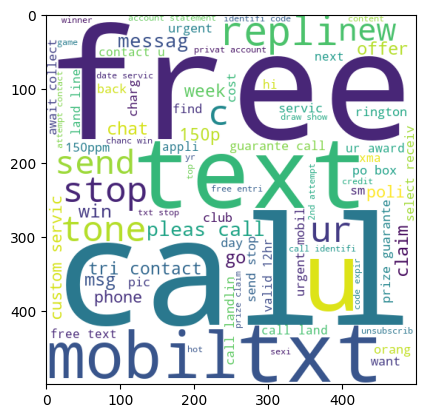

In [131]:
plt.imshow(spam_wc)

In [132]:
ham_wc =  wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))  

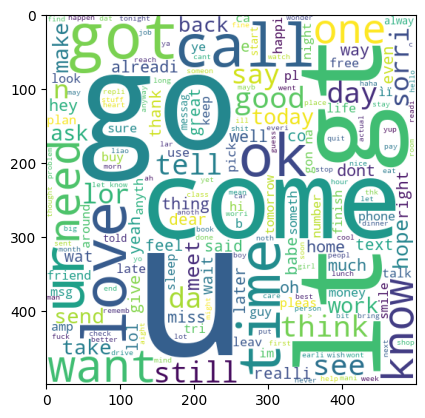

In [133]:
plt.imshow(ham_wc)

In [134]:
from collections import Counter

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

top_30_spam = Counter(spam_corpus).most_common(30)
top_30_ham = Counter(ham_corpus).most_common(30)

print("Top 30 Spam Words:")
print(top_30_spam)

print("\nTop 30 Ham Words:")
print(top_30_ham)


Top 30 Spam Words:
[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]

Top 30 Ham Words:
[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 142), ('tell', 133), ('make', 129)]


### staring building the model ###

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [136]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [137]:
X.shape

(5169, 6708)

In [138]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Accuracy Score:", accuracy_score(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.52      0.87      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034

Confusion Matrix:
 [[772 117]
 [ 19 126]]
Accuracy Score: 0.8684719535783365


In [142]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy of MultinomialNB: ", accuracy_score(y_test, y_pred2))
print("Confusion Matrix of MultinomialNB: ", confusion_matrix(y_test, y_pred2))
print("Classification Report of MultinomialNB: ", classification_report(y_test, y_pred2))

Accuracy of MultinomialNB:  0.9738878143133463
Confusion Matrix of MultinomialNB:  [[872  17]
 [ 10 135]]
Classification Report of MultinomialNB:                precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [143]:
bnb.fit(X_train, y_train)
y_pred3  = bnb.predict(X_test)
print("Accuracy of MultinomialNB: ", accuracy_score(y_test, y_pred3))
print("Confusion Matrix of MultinomialNB: ", confusion_matrix(y_test, y_pred3))
print("Classification Report of MultinomialNB: ", classification_report(y_test, y_pred3))

Accuracy of MultinomialNB:  0.9661508704061895
Confusion Matrix of MultinomialNB:  [[885   4]
 [ 31 114]]
Classification Report of MultinomialNB:                precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [144]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TF-IDF
tfidf = TfidfVectorizer(max_features=3000)

# Split FIRST (on raw text)
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['transformed_text'],
    df['target'],
    test_size=0.2,
    random_state=42
)

# Fit on train, transform both
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

# Model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediction
y_pred = mnb.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.78      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[888   1]
 [ 32 113]]
Accuracy: 0.9680851063829787


In [146]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

y_pred = gnb.predict(X_test.toarray())

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.84      0.90       889
           1       0.45      0.83      0.59       145

    accuracy                           0.84      1034
   macro avg       0.71      0.84      0.74      1034
weighted avg       0.90      0.84      0.85      1034

[[743 146]
 [ 24 121]]
Accuracy: 0.8355899419729207


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TF-IDF (Binary)
tfidf = TfidfVectorizer(
    max_features=3000,
    binary=True   # IMPORTANT for BernoulliNB
)

# Split raw text
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['transformed_text'],
    df['target'],
    test_size=0.2,
    random_state=42
)

# Fit & transform
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Prediction
y_pred = bnb.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.98      0.84      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034

[[886   3]
 [ 23 122]]
Accuracy: 0.9748549323017408


In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'sigmoid', 'linear']
}

# Initialize GridSearchCV with precision as the scoring metric
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='precision', cv=5)
from sklearn.metrics import classification_report

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Fit the model to find the best parameters
grid.fit(X_train, y_train)

# Display the best parameters and the best precision score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Precision Score: {grid.best_score_}")
print(f"Best Model: {grid.best_estimator_}")

# Use the best estimator for predictions
best_model = grid.best_estimator_


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       889
           1       0.99      0.48      0.64       145

    accuracy                           0.93      1034
   macro avg       0.95      0.74      0.80      1034
weighted avg       0.93      0.93      0.91      1034

Fitting 5 folds for each of 48 candidates, totalling 240 fits


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...................

d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...................

d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...................

In [149]:
from sklearn.svm import SVC

model = SVC(C=0.1, gamma=1, kernel='sigmoid')
model.fit(X_train, y_train)

model.score(X_test, y_test)
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.925531914893617
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       889
           1       0.99      0.48      0.64       145

    accuracy                           0.93      1034
   macro avg       0.95      0.74      0.80      1034
weighted avg       0.93      0.93      0.91      1034



In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Define models with variations
models = {
    'SVC_Sigmoid': SVC(kernel='sigmoid', gamma=1.0),
    'SVC_RBF': SVC(kernel='rbf', gamma=1.0),
    'Logistic_Regression_L1': LogisticRegression(solver='liblinear', penalty='l1'),
    'Logistic_Regression_L2': LogisticRegression(solver='liblinear', penalty='l2'),
    'Multinomial_NB': MultinomialNB(),
    'Decision_Tree_D5': DecisionTreeClassifier(max_depth=5),
    'Decision_Tree_D10': DecisionTreeClassifier(max_depth=10),
    'SVC_Linear': SVC(kernel='linear', gamma=1.0),
    'Logistic_Regression_C0_1': LogisticRegression(solver='liblinear', C=0.1),
    'Logistic_Regression_C10': LogisticRegression(solver='liblinear', C=10.0),
    'Multinomial_NB_Alpha_0_1': MultinomialNB(alpha=0.1),
    'Decision_Tree_D20': DecisionTreeClassifier(max_depth=20),
    'Random_Forest_E100': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNeighbors_K3': KNeighborsClassifier(
        n_neighbors=3),
    'KNeighbors_K5': KNeighborsClassifier(n_neighbors=5),
    'Multinomial_NB_Alpha_0_5': MultinomialNB(alpha=0.5),
    'Random_Forest_E50': RandomForestClassifier(n_estimators=50, random_state=42)
}



results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Algorithm': name,
        'Parameters': str(model.get_params()),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred)
    })

performance_df = pd.DataFrame(results).sort_values(by='Precision', ascending=False)
performance_df


d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
d:\ML_Project\Email Spam Classifier\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', 

,Algorithm,Parameters,Accuracy,Precision
1,SVC_RBF,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.976789,1.000000
4,Multinomial_NB,"{'alpha': 1.0, 'class_prior': None, 'fit_prior...",0.969052,0.991304
15,Multinomial_NB_Alpha_0_5,"{'alpha': 0.5, 'class_prior': None, 'fit_prior...",0.976789,0.984000
16,Random_Forest_E50,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.972921,0.983471
12,Random_Forest_E100,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.970986,0.983193
14,KNeighbors_K5,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.909091,0.981132
7,SVC_Linear,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.980658,0.969925
10,Multinomial_NB_Alpha_0_1,"{'alpha': 0.1, 'class_prior': None, 'fit_prior...",0.975822,0.968750
0,SVC_Sigmoid,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.978723,0.962406
9,Logistic_Regression_C10,"{'C': 10.0, 'class_weight': None, 'dual': Fals...",0.978723,0.962406


In [160]:
from sklearn.svm import SVC

SVC_RBF = SVC(
    C=1.0,
    break_ties=False,
    cache_size=200,
    class_weight=None,
    coef0=0.0,
    decision_function_shape='ovr',
    degree=3,
    gamma=1.0,
    kernel='rbf',
    max_iter=-1,
    probability=False,
    random_state=None,
    shrinking=True,
    tol=0.001,
    verbose=False
)
from sklearn.metrics import accuracy_score, precision_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))


Accuracy Score: 0.9729206963249516
Precision Score: 0.9834710743801653


In [ ]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
# Load the saved vectorizer and model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

def predict_spam(text):
    # Transform the input text using the loaded vectorizer
    vector_input = tfidf.transform([text])
    # Predict using the loaded model
    result = model.predict(vector_input)[0]
    return "Spam" if result == 1 else "Not Spam"

# Example usage
message = "Congratulations! You've won a free prize. Click here to claim."
print(predict_spam(message))


Spam
